# My name: Bryan Lihardinata
## Assignment Name: CA05 - Logistic Regression

# Program Inititialization Section
## Enter your import packages here

In [1]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Cardiovascular Disease (CVD) kills more people than cancer globally. 
###A dataset of real heart patients collected from a 15 year heart study cohort is made available for this assignment. 
###The dataset has 16 patient features. Note that none of the features include any Blood Test information.
- #### age_s1 = study date - DOB (age when the study takes place)
- #### race = 1=white, 2=black, 3=other
- #### mstat = marriage status: 1=married 2=widowed 3=divorced/separated 4=never married 8=unknown/refused
- #### neck20 = neck circumference in cm; waist = waist circumference in cm; hip = hip circumference in cm
- #### cgpkyr = lifetime cigarette smoking date
- #### tea15 = How many cups of tea (with caffeine) do you drink on a regular day?
- #### srhype = self-reported hypertension
- #### parrptdiab = diabetes status (0=no, 1 = yes)
- #### bend25 = Does your health now limit you in this activity, and if so, how much: Bending, kneeling, or stooping?
- #### happy25 = During the past 4 weeks, how much of the time: Have you been a happy person? (1 = all the time, 6 = not at all)
- #### tired 25 = During the past 4 weeks, how much of the time: Did you feel tired? (1 = all the time, 6 = not at all)
- #### hlthlm25 = During the past 4 weeks, how much of the time: Has your health limited your social activities (like visiting with friends or close relatives)? (1 = all the time, 5 = not at all)

The explanation of the above variables can be found here: https://sleepdata.org/datasets/shhs/variables

In [2]:
#read datasets
df = pd.read_csv('https://raw.githubusercontent.com/blihardinata/Python_Portfolio/main/CardiovascularDisease_LogisticRegression/cvd_data.csv')
df

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,1,66,1,2,1,95.0,41.5,99.0,88.2,0.0,0,1,0,2,2,5,4
3238,1,54,1,3,1,99.0,34.9,99.0,83.3,30.0,0,0,0,3,3,3,4
3239,1,55,1,4,1,101.0,37.0,91.0,75.2,0.0,0,0,0,3,2,5,4
3240,1,53,1,2,1,98.0,39.0,93.0,79.0,0.0,0,0,0,2,2,5,4


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.




In [3]:
#Statistical Description of data (data.describe)
df.describe()
#result nothing because the data has been discretized

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


In [ ]:
#Statistical Description of data (data.shape)
df.shape

(3242, 17)

In [4]:
#Display number of non-null values for each column (data.count)
df.count()
#no null value

cvd_4types      3242
age_s1          3242
race            3242
educat          3242
mstat           3242
hip             3242
neck20          3242
waist           3242
av_weight_kg    3242
cgpkyr          3242
tea15           3242
srhype          3242
parrptdiab      3242
bend25          3242
happy25         3242
tired25         3242
hlthlm25        3242
dtype: int64

In [5]:
#double Checking null value
df[df.isnull().any(axis=1)].count()

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

In [6]:
#Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


In [7]:
#Display Top 10 and Bottom 10 records (head and tail)
df.head(10)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.00,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.00,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.50,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.00,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.00,0,0,0,2,1,1,2
5,0,67,1,3,3,140.0,35.5,101.0,87.2,0.00,0,1,0,1,1,4,4
6,0,68,1,2,1,101.0,39.0,93.0,80.5,9.20,0,0,0,2,3,4,4
7,0,67,1,2,1,107.0,32.0,80.0,73.2,0.00,0,1,0,2,2,4,4
8,0,44,1,2,1,100.0,36.5,89.0,79.1,6.75,0,0,0,3,3,4,4
9,0,42,1,2,1,105.0,35.5,90.0,78.1,21.00,0,0,0,3,2,3,3


In [8]:
df.tail(10)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
3232,1,55,1,4,1,117.0,35.5,107.0,88.4,0.0,3,0,0,3,1,5,4
3233,1,71,1,1,2,114.0,35.0,117.0,85.1,0.0,0,1,0,1,3,4,4
3234,1,55,1,3,1,93.0,29.5,81.0,76.7,0.0,0,0,0,3,2,4,4
3235,1,59,1,1,1,104.0,40.0,101.0,87.5,0.0,0,1,0,3,2,5,4
3236,1,54,1,2,1,115.0,36.0,103.0,84.4,14.0,0,0,0,3,2,5,4
3237,1,66,1,2,1,95.0,41.5,99.0,88.2,0.0,0,1,0,2,2,5,4
3238,1,54,1,3,1,99.0,34.9,99.0,83.3,30.0,0,0,0,3,3,3,4
3239,1,55,1,4,1,101.0,37.0,91.0,75.2,0.0,0,0,0,3,2,5,4
3240,1,53,1,2,1,98.0,39.0,93.0,79.0,0.0,0,0,0,2,2,5,4
3241,1,54,1,2,1,109.0,48.6,112.0,93.5,39.0,0,1,0,3,2,5,4


Text(0.5, 1.0, 'Cardiovascular Disease')

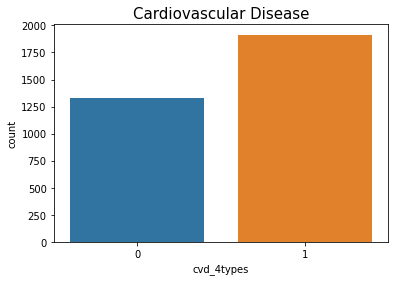

In [9]:
#comparing cardiovascular disease
#0 = no cardiovascular, 1 = has cardiovascular
import seaborn as sn
sn.countplot(x='cvd_4types', data=df)
plt.title('Cardiovascular Disease', fontsize = 15)


In [10]:
#checking correlation coefficient for each variable with correlation matrix
df.corr()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
cvd_4types,1.000000,0.089168,-0.143843,0.053662,-0.076659,0.018482,0.101653,0.203104,0.058616,0.037151,-0.028436,0.071819,0.074406,-0.009653,-0.033048,0.022130,-0.126168
age_s1,0.089168,1.000000,0.000626,-0.207595,0.013170,-0.121743,-0.001135,0.086363,0.073152,0.072336,-0.007279,0.268032,0.140819,-0.224303,-0.044323,0.012448,-0.164790
race,-0.143843,0.000626,1.000000,-0.061934,0.058878,0.030535,-0.010810,0.012960,0.045118,-0.040240,-0.005746,0.053822,0.079818,-0.064647,0.005103,-0.014226,-0.117117
educat,0.053662,-0.207595,-0.061934,1.000000,0.026047,-0.008162,0.000856,-0.057212,-0.052692,-0.047632,0.022097,-0.110072,-0.117066,0.166887,-0.093659,0.079794,0.096398
mstat,-0.076659,0.013170,0.058878,0.026047,1.000000,0.012425,-0.078962,-0.044175,-0.046429,-0.006983,0.012250,-0.002689,0.012210,-0.016304,0.033619,-0.031645,-0.055162
hip,0.018482,-0.121743,0.030535,-0.008162,0.012425,1.000000,0.321828,0.710743,0.428565,-0.006662,0.003894,0.121578,0.085835,-0.229975,0.029561,-0.131190,-0.096214
neck20,0.101653,-0.001135,-0.010810,0.000856,-0.078962,0.321828,1.000000,0.617500,0.525890,0.190235,0.022729,0.105139,0.118303,-0.091327,0.008170,0.002945,-0.010144
waist,0.203104,0.086363,0.012960,-0.057212,-0.044175,0.710743,0.617500,1.000000,0.641330,0.112615,0.014916,0.201122,0.134582,-0.246275,0.020475,-0.091524,-0.111527
av_weight_kg,0.058616,0.073152,0.045118,-0.052692,-0.046429,0.428565,0.525890,0.641330,1.000000,0.111671,0.013763,0.196695,0.094746,-0.155036,0.028020,-0.054466,-0.015056
cgpkyr,0.037151,0.072336,-0.040240,-0.047632,-0.006983,-0.006662,0.190235,0.112615,0.111671,1.000000,0.000500,0.013163,0.044049,-0.056544,0.026469,-0.051990,-0.030523


Text(0.5, 1.0, 'Correlation Heatmap')

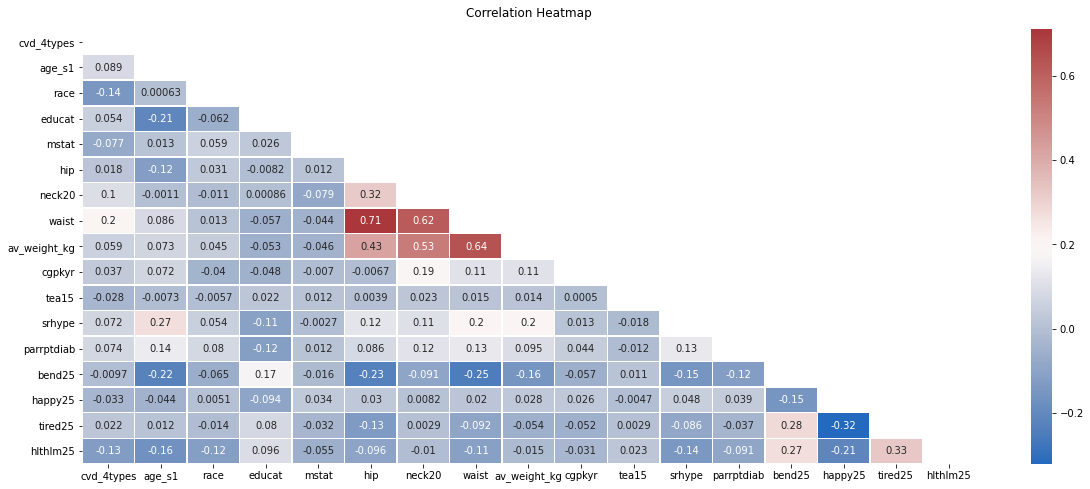

In [11]:

plt.figure(figsize=(20,8))

#np.triu = to isolate the upper triangle of a matrix while turning all the values in the lower triangle into 0
#When we set the datatype to ‘boolean’, all 1 turns into True, all 0 into False.
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

heatmap = sn.heatmap(df.corr(), mask=mask, annot=True, cmap="vlag", linewidths=.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Removing some variables with high correlation to eliminate multi-collinearity. Based on the above graph, the variable of "waist" will be eliminated as it has a high correlation with "hip"

In [12]:
df = df.drop('waist', axis = 'columns')
df.head(10)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,87.5,34.00,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,83.5,0.00,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,86.2,49.50,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,89.1,0.00,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,81.3,0.00,0,0,0,2,1,1,2
5,0,67,1,3,3,140.0,35.5,87.2,0.00,0,1,0,1,1,4,4
6,0,68,1,2,1,101.0,39.0,80.5,9.20,0,0,0,2,3,4,4
7,0,67,1,2,1,107.0,32.0,73.2,0.00,0,1,0,2,2,4,4
8,0,44,1,2,1,100.0,36.5,79.1,6.75,0,0,0,3,3,4,4
9,0,42,1,2,1,105.0,35.5,78.1,21.00,0,0,0,3,2,3,3


## Beautifying the dataset
- Clarifying all the column names





In [13]:
#Rename the columns for a better clarification
df.rename(columns= {'age_s1':'age', 
                    'mstat':'marital',
                    'neck20': 'neck',
                    'cgpkyr':'smoking_rate',
                    'tea15':'caffeine_rate',
                    'srhype':'hypertension',
                    'bend25':'bending_rate',
                    'happy25':'happiness_rate',
                    'tired25':'fatigue_rate',
                    'hlthlm25': 'activity_rate',
                    'parrptdiab':'diabetes',
                    'cvd_4types':'cvd_risk'}, inplace= True)
df

,cvd_risk,age,race,educat,marital,hip,neck,av_weight_kg,smoking_rate,caffeine_rate,hypertension,diabetes,bending_rate,happiness_rate,fatigue_rate,activity_rate
0,0,54,1,2,1,110.0,40.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,81.3,0.0,0,0,0,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,1,66,1,2,1,95.0,41.5,88.2,0.0,0,1,0,2,2,5,4
3238,1,54,1,3,1,99.0,34.9,83.3,30.0,0,0,0,3,3,3,4
3239,1,55,1,4,1,101.0,37.0,75.2,0.0,0,0,0,3,2,5,4
3240,1,53,1,2,1,98.0,39.0,79.0,0.0,0,0,0,2,2,5,4


# Build Binary Classifier Models

## Splitting the dataframe into x (variables) and y (result)

In [14]:
x = df.iloc[:, 1:16]
x.head(10)

,age,race,educat,marital,hip,neck,av_weight_kg,smoking_rate,caffeine_rate,hypertension,diabetes,bending_rate,happiness_rate,fatigue_rate,activity_rate
0,54,1,2,1,110.0,40.0,87.5,34.00,0,1,0,1,2,3,4
1,56,3,2,1,113.0,34.0,83.5,0.00,0,0,0,2,2,1,3
2,54,1,3,1,110.0,44.5,86.2,49.50,0,0,0,3,2,6,4
3,54,1,3,1,129.0,42.5,89.1,0.00,0,0,0,3,2,1,3
4,51,3,2,1,122.0,37.0,81.3,0.00,0,0,0,2,1,1,2
5,67,1,3,3,140.0,35.5,87.2,0.00,0,1,0,1,1,4,4
6,68,1,2,1,101.0,39.0,80.5,9.20,0,0,0,2,3,4,4
7,67,1,2,1,107.0,32.0,73.2,0.00,0,1,0,2,2,4,4
8,44,1,2,1,100.0,36.5,79.1,6.75,0,0,0,3,3,4,4
9,42,1,2,1,105.0,35.5,78.1,21.00,0,0,0,3,2,3,3


In [15]:
y = df.iloc[:, :1]
y.head(10)

,cvd_risk
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## Checking P value

Note: The following method is a method used for R

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:

#without print function, the returned value is not written in R format
#binomial refers to the family that logistic regression belongs to
model = smf.glm(formula = "y ~ x", family=sm.families.Binomial(), data = df).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 3242
Model:                            GLM   Df Residuals:                     3226
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2061.8
Date:                Wed, 19 May 2021   Deviance:                       4123.6
Time:                        07:58:27   Pearson chi2:                 3.29e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5268      0.760      0.693      0.4

In [18]:
#for education purposes and to show the variable names
mod = sm.OLS(y, x)
mod_result = mod.fit()
print(mod_result.summary())

                                 OLS Regression Results                                
Dep. Variable:               cvd_risk   R-squared (uncentered):                   0.621
Model:                            OLS   Adj. R-squared (uncentered):              0.619
Method:                 Least Squares   F-statistic:                              351.9
Date:                Wed, 19 May 2021   Prob (F-statistic):                        0.00
Time:                        07:58:29   Log-Likelihood:                         -2174.2
No. Observations:                3242   AIC:                                      4378.
Df Residuals:                    3227   BIC:                                      4470.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

Alpha is at 5%. Hence, we eliminate all variables with P value above 5% as these variables have no relationship with the cardiovascular risk. The following variables are to be removed:
- hip
- av_weight_kg
- smoking_rate
- caffeine_rate
- bending rate

According to National Health Service, among the above variables, smoking_rate and av_weight_kg are the major causes of cardiovascular diseases. Hence, these two variables will not be eliminated.  Additionally, I am keeping the hip variable as I have removed a collinearity variable during data investigation. 

https://www.nhs.uk/conditions/cardiovascular-disease/

In [19]:
x = x.drop(['caffeine_rate', 'bending_rate'], axis = 'columns')
x.head(10)

,age,race,educat,marital,hip,neck,av_weight_kg,smoking_rate,hypertension,diabetes,happiness_rate,fatigue_rate,activity_rate
0,54,1,2,1,110.0,40.0,87.5,34.00,1,0,2,3,4
1,56,3,2,1,113.0,34.0,83.5,0.00,0,0,2,1,3
2,54,1,3,1,110.0,44.5,86.2,49.50,0,0,2,6,4
3,54,1,3,1,129.0,42.5,89.1,0.00,0,0,2,1,3
4,51,3,2,1,122.0,37.0,81.3,0.00,0,0,1,1,2
5,67,1,3,3,140.0,35.5,87.2,0.00,1,0,1,4,4
6,68,1,2,1,101.0,39.0,80.5,9.20,0,0,3,4,4
7,67,1,2,1,107.0,32.0,73.2,0.00,1,0,2,4,4
8,44,1,2,1,100.0,36.5,79.1,6.75,0,0,3,4,4
9,42,1,2,1,105.0,35.5,78.1,21.00,0,0,2,3,3


##Splitting x and y into train and test

In [20]:
#splitting train and test data
from sklearn.model_selection import train_test_split

In [21]:
#splitting train to 70% and test to 30%
#random state ensures that once the dataset is split, x and y values do not change
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [22]:
#ctrl + shift + enter to run the focused selection
x_train.head(10)
x_test.head(10)
y_train.head(10)
y_test.head(10)

,cvd_risk
2858,1
1238,0
3113,1
2796,0
647,0
980,0
372,0
6,0
431,0
1416,1


# Part 1: build a binary classifier model to predict the CVD Risk (Yes/No, or 1/0) using a Logistic Regression Model with the best performance possible

In [23]:
from sklearn import linear_model

- C = Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
 - Regularization normally tries to reduce or penalize the complexity of the model
 - Default = 1
 - Overfitting: C is too large; Underfitting: C is too small
- Penalty = Used to specify the norm used in the penalization 
  - L1 regularization penalizes the LLF with the scaled sum of the absolute values of the weights
  - L2 regularization penalizes the LLF with the scaled sum of the squares of the weights (DEFAULT)
  - Elastic-net regularization is a linear combination of L1 and L2 regularization
- solver = Algorithm to use in the optimization problem
  - liblinear = It is a good choice for small datasets. It also handles L1 penalty. For multiclass problems, it is limited to one-versus-rest schemes. (DEFAULT)
  - newton-cg − It handles only L2 penalty
- predict = Predict class labels for samples -> array-like or sparse matrix, shape (n_samples, n_features)

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [25]:
#check the data with variety of C score
results = []
c_values = [1e-20, 1e-10, 1, 1e10, 1e20, 1e30, 1e40]

for value in c_values:
  clf = linear_model.LogisticRegression(C=value, solver= 'newton-cg')
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  results.append(accuracy)

#Please note that the accuracy score is on the next line

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm 

In [26]:
print(results)

[0.5734840698869476, 0.5734840698869476, 0.6628982528263104, 0.6618705035971223, 0.6618705035971223, 0.6618705035971223, 0.6618705035971223]


The accuracy score above shows that the most optimum c values is 1e10

In [27]:
#fit (train) the logistic regression classfiers
clf = linear_model.LogisticRegression(C=1e10, solver= 'newton-cg')
clf.fit(x_train, y_train)

#predict
y_pred = clf.predict(x_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1
 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
#measure the accuracy of the model
clf.score(x_test, y_test)

0.6618705035971223

In [29]:
#prediction outcome based on the trained model
#the first value refers to the probability that a patient doesn't have cvd risk or cvd_risk = 0
#the second value refers to the porbability that a patient has cvd_risk or cvd_risk = 1
clf.predict_proba(x_test)

array([[0.39785965, 0.60214035],
       [0.37414912, 0.62585088],
       [0.33598911, 0.66401089],
       ...,
       [0.32664773, 0.67335227],
       [0.59511345, 0.40488655],
       [0.4116717 , 0.5883283 ]])

# Part 2: Display the Feature Importance of all the features sorted in the order of decreasing influence on the CVD Risk 

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [32]:
#approach 1 does not work
#A higher value (sign considered) of the Coefficients will imply larger influence of the corresponding features on the Outcome (Target Variable)
model.fit(x_train / np.std(x_train, 0), y_train)
print(model.coef_)

[[ 0.1089149  -0.34247279  0.18301287 -0.13314464 -0.02185253  0.13525195
   0.08857879  0.02885068  0.08200392  0.15108188 -0.08354745  0.1156996
  -0.39456157]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
coeff_df = pd.DataFrame(model.coef_, columns=[x_train], index=['Coefficient'])
coeff_df

,age,race,educat,marital,hip,neck,av_weight_kg,smoking_rate,hypertension,diabetes,happiness_rate,fatigue_rate,activity_rate
Coefficient,0.108915,-0.342473,0.183013,-0.133145,-0.021853,0.135252,0.088579,0.028851,0.082004,0.151082,-0.083547,0.1157,-0.394562


In [34]:
coeff_df = coeff_df.transpose()
coeff_df.sort_values('Coefficient', ascending=False)

,Coefficient
educat,0.183013
diabetes,0.151082
neck,0.135252
fatigue_rate,0.115700
age,0.108915
av_weight_kg,0.088579
hypertension,0.082004
smoking_rate,0.028851
hip,-0.021853
happiness_rate,-0.083547


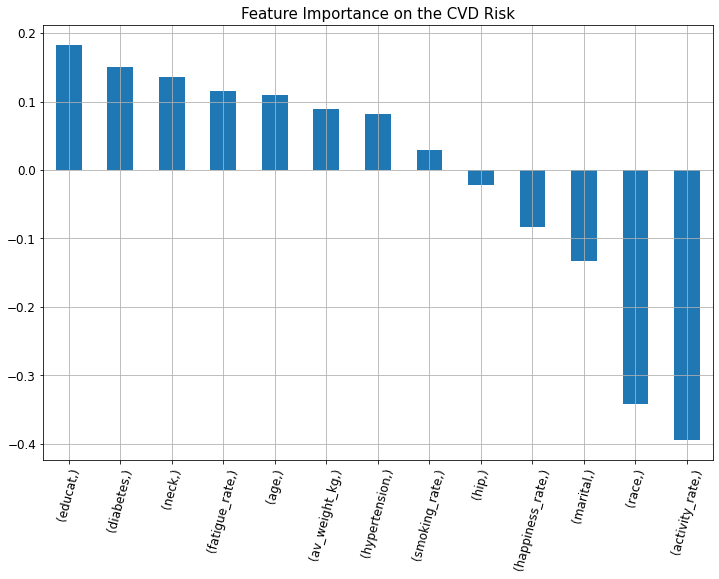

In [35]:

coeff_df.sort_values('Coefficient', ascending=False).plot(kind = 'bar',  figsize = (12,8), legend = None)
plt.title('Feature Importance on the CVD Risk', fontsize = 15)
plt.xticks(rotation = 75, fontsize=12)
plt.yticks(fontsize=12)
plt.grid()

These coefficients can provide the basis for a feature importance score. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.


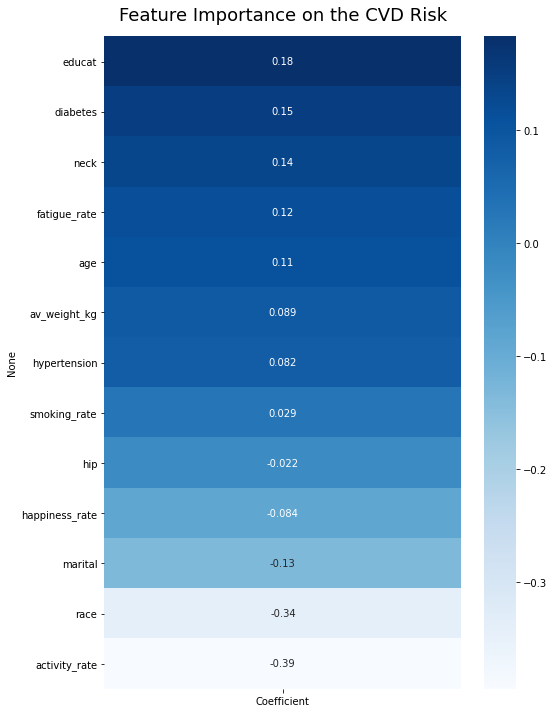

In [36]:
plt.figure(figsize=(8, 12))
heatmap = sn.heatmap(coeff_df.sort_values('Coefficient', ascending=False), annot=True, cmap='Blues')
heatmap.set_title('Feature Importance on the CVD Risk', fontdict={'fontsize':18}, pad=16);

# Part 3: Evaluate the performance of your model (including ROC Curve), explain the performance and draw a meaningful conclusion.

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [38]:
#without print, the result returns as a list
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.35      0.47       415
           1       0.65      0.89      0.75       558

    accuracy                           0.66       973
   macro avg       0.68      0.62      0.61       973
weighted avg       0.67      0.66      0.63       973



In [39]:
conf = confusion_matrix(y_test, y_pred)
print(conf)

[[147 268]
 [ 61 497]]


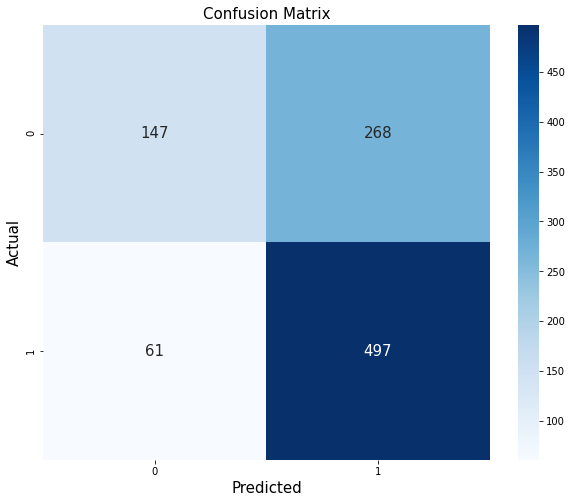

In [40]:
import seaborn as sn
#annot_kws to show font size
#cmap -> to change the color
plt.figure(figsize=(10,8))
sn.heatmap(conf, annot=True, cmap="Blues", fmt= "d", annot_kws={"size": 15})
plt.title('Confusion Matrix', fontsize = 15)
plt.xlabel('Predicted', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Actual', fontsize = 15)
plt.show()

In [41]:
#Accuracy Score
accuracy_score(y_test, y_pred)

0.6618705035971223

In [42]:
#AUC Score
AUC = roc_auc_score(y_test, y_pred)
AUC

0.6224489355270545

In [43]:
#True Positive Rate or Recall
recall = recall_score(y_test, y_pred)
recall

0.8906810035842294

In [44]:
#False Positive Rate

FPR = 268/(268+147)
FPR

0.6457831325301204

In [45]:
malignant_probs = y_pred

FPR, recall, thresholds = roc_curve(y_test, malignant_probs)

roc_auc = auc(FPR, recall)
print(roc_auc)

0.6224489355270545


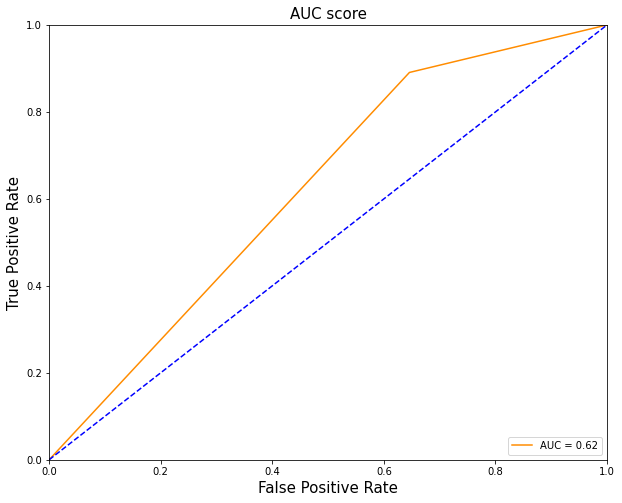

In [46]:
#ROC
#AUC = %number" -> to show how many number behind the decimal value
#'b' -> refer to collor

plt.figure(figsize=(10,8))
plt.title('AUC score', fontsize = 15)
plt.plot(FPR, recall, color= 'darkorange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
#creating dot blue line to show AUC at 50% or 0.5
#AUC 0.5 = worst prediction
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.show()


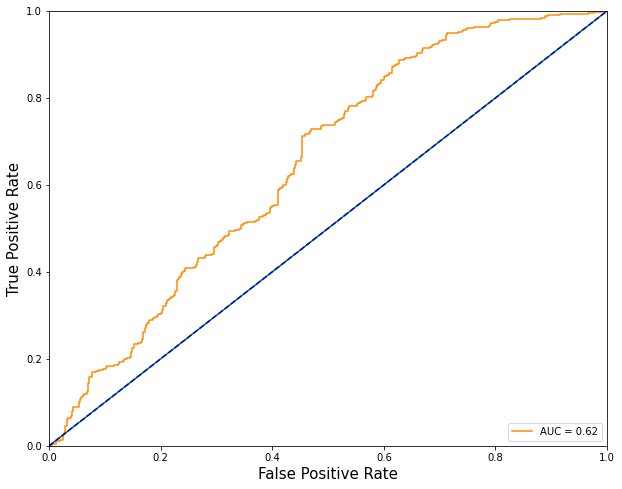

In [62]:
#Other graph idea
y_pred_prob = clf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


plt.figure(figsize=(10,8))
plt.plot(fpr,tpr, color= 'darkorange', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'g-')
plt.legend(loc = 'lower right')
#creating dot blue line to show AUC at 50% or 0.5
#AUC 0.5 = worst prediction
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.show()

**Model:** The multi-collinearity variable has been eliminated to ensure that the variables do not affect the regression outcome. Additionally, some variables that show a zero relationship with cardiovascular risk have been eliminated because I want to reduce the possibility of hypothesis error from occuring

**Conclusion:** This model is a well-acceptable model with AUC score at 62.24%. The graph also shows that the true positive rate is significantly higher than the false positive rate. The recall score shows that the model is very good at making an accurate prediction out of the overall positive cases. 